In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
IMAGE_SIZE = [224, 224]

In [12]:
train_path = 'C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train'
valid_path = 'C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Test'

In [13]:
mobilenet_v2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [14]:
for layer in mobilenet_v2.layers:
  layer.trainable = False

In [15]:
folders = os.listdir('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train')

In [16]:
x = Flatten()(mobilenet_v2.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
model = Model(inputs=mobilenet_v2.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [20]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 250 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Shanto\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
8/8 [==============================] - 11s 548ms/step - loss: 4.3903 - accuracy: 0.5320 - val_loss: 0.5073 - val_accuracy: 0.9240
Epoch 2/5
8/8 [==============================] - 3s 394ms/step - loss: 0.5054 - accuracy: 0.9240 - val_loss: 0.2306 - val_accuracy: 0.9520
Epoch 3/5
8/8 [==============================] - 3s 386ms/step - loss: 0.2908 - accuracy: 0.9640 - val_loss: 0.1855 - val_accuracy: 0.9560
Epoch 4/5
8/8 [==============================] - 3s 380ms/step - loss: 0.0285 - accuracy: 0.9840 - val_loss: 0.0337 - val_accuracy: 0.9840
Epoch 5/5
8/8 [==============================] - 3s 386ms/step - loss: 0.0831 - accuracy: 0.9840 - val_loss: 0.0010 - val_accuracy: 1.0000


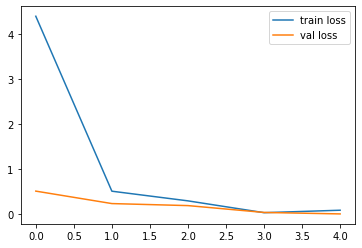

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

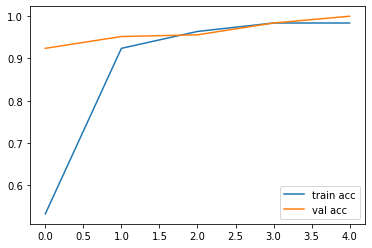

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('thesis_mobilev2.h5')

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

In [29]:
def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
      for name in dirs:
        list_.append(name)
    return list_    

In [32]:
my_model = load_model('C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\mobilenetv2\\thesis_mobilev2.h5', compile = False)
food_list = create_foodlist("C:\\Users\\Shanto\\Downloads\\bengali snacks dataset\\Dataset\\Train") 


PREDICTIONS BASED ON PICTURES UPLOADED


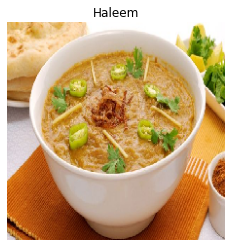

In [35]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)    
    
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

images = []

images.append('Haleem(2).jpg')


print("PREDICTIONS BASED ON PICTURES UPLOADED")
predict_class(my_model, images, True)
